In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = int(10e4)  # Number of simulation
S0 = 100  # Initial stock price
mu = 0.07  # Drift (average return)
r = 0.02  # Interest rate
sigma = 0.2  # Volatility (standard deviation of returns)
T = 5  # Time horizon (in years)
dt = 1 / 252  # Simulate daily price

## Underlying stock
Assume sotck price $S_t$ follows the geometic Brownian motion, i.e.

$ S_{t_2} = S_{t_1}e^{(\mu-\frac{\sigma^2}{2})(t_2-t_1)+\sigma(W_{t_2}-W_{t_1})}$

We then compute the dollarized Sharpe ratio (SR) by assuming that the financing cost is the interest rate. The SR increases when there is a higher drift or longer time horizon, or when the interest rate and volatility increase.

The first few simulation results:

 [[100.         100.65717867 101.44326851 ...  61.27590489  60.72492819
   60.81263444]
 [100.          99.12507763  99.0409508  ... 124.08320836 122.48254161
  123.57578197]
 [100.          97.7584563   97.78626057 ... 237.03380409 244.89757613
  249.91651432]
 [100.         100.46711807  98.40154155 ...  98.43015803  98.60958171
  100.72723768]
 [100.          98.33664625  96.91736424 ... 232.27422077 229.12691673
  227.67372914]]




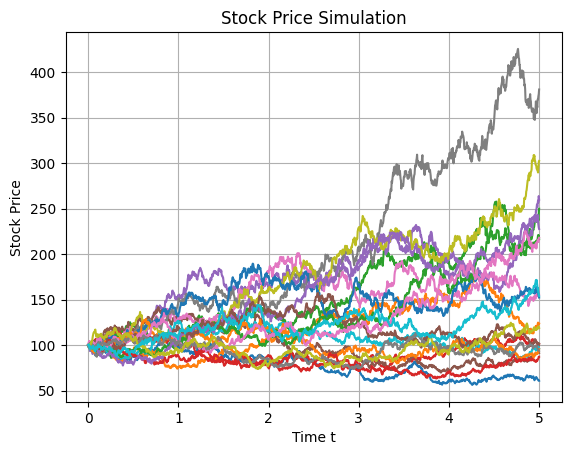

In [2]:
# Simulate sotck price
arr_diffusion = (sigma * np.sqrt(dt) * np.random.standard_normal((N, 252*T))).cumsum(axis=1)
arr_drift = np.array([(mu - 0.5 * sigma**2) * i * dt for i in range(1, 252*T+1)])
arr_S = S0 * np.exp(arr_drift + arr_diffusion)
arr_S = np.hstack((np.array([[S0]*N]).T, arr_S))

print(f'The first few simulation results:\n\n {arr_S[:5]}\n\n')


# Plot some simulation results
t = np.linspace(0, T, 252*T+1)
for S in arr_S[:20]:
    plt.plot(t, S)
plt.xlabel('Time t')
plt.ylabel('Stock Price')
plt.title('Stock Price Simulation')
plt.grid(True)
plt.show()

In [3]:
# Compute dollarized Sharpe ratio (SR)
SR_S = ( arr_S[:,-1] - S0*np.exp(r*T) ).mean() / ( arr_S[:,-1] - S0*np.exp(r*T) ).std()
print(f'The dollarized Sharpe ratio is: {SR_S}')

The dollarized Sharpe ratio is: 0.46955256849615995


In [4]:
# Sensitivity analysis on SR
def dollarized_SR(S0, mu, r, sigma, T):
    arr_diffusion = (sigma * np.sqrt(dt) * np.random.standard_normal((N, 252*T))).cumsum(axis=1)
    arr_drift = np.array([(mu - 0.5 * sigma**2) * i * dt for i in range(1, 252*T+1)])
    arr_S = S0 * np.exp(arr_drift + arr_diffusion)
    arr_S = np.hstack((np.array([[S0]*N]).T, arr_S))

    SR_S = ( arr_S[:,-1] - S0*np.exp(r*T) ).mean() / ( arr_S[:,-1] - S0*np.exp(r*T) ).std()

    return SR_S

for S0 in [60,70,80,90,100,110,120,130,140]:
   SR = dollarized_SR(S0, mu, r, sigma, T)
   print(f'When S0 = {S0} SR = {SR:.4f}')
   if S0 == 140:
      print('')
      S0 = 100

for mu in [0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11]:
   SR = dollarized_SR(S0, mu, r, sigma, T)
   print(f'When mu = {mu} SR = {SR:.4f}')
   if mu == 0.11:
      print('')
      mu = 0.07

for r in [0.016,0.017,0.018,0.019,0.020,0.021,0.022,0.023,0.024]:
   SR = dollarized_SR(S0, mu, r, sigma, T)
   print(f'When r = {r} SR = {SR:.4f}')
   if r == 0.024:
      print('')
      r = 0.020

for sigma in [0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24]:
   SR = dollarized_SR(S0, mu, r, sigma, T)
   print(f'When sigma = {sigma} SR = {SR:.4f}')
   if sigma == 0.24:
      print('')
      sigma = 0.20

for T in [1,2,3,4,5,6,7,8,9]:
   SR = dollarized_SR(S0, mu, r, sigma, T)
   print(f'When T = {T} SR = {SR:.4f}')
   if T == 9:
      print('')
      T = 5

When S0 = 60 SR = 0.4725
When S0 = 70 SR = 0.4749
When S0 = 80 SR = 0.4747
When S0 = 90 SR = 0.4683
When S0 = 100 SR = 0.4712
When S0 = 110 SR = 0.4697
When S0 = 120 SR = 0.4687
When S0 = 130 SR = 0.4734
When S0 = 140 SR = 0.4704

When mu = 0.03 SR = 0.0991
When mu = 0.04 SR = 0.2045
When mu = 0.05 SR = 0.2936
When mu = 0.06 SR = 0.3862
When mu = 0.07 SR = 0.4723
When mu = 0.08 SR = 0.5497
When mu = 0.09 SR = 0.6323
When mu = 0.1 SR = 0.6985
When mu = 0.11 SR = 0.7718

When r = 0.016 SR = 0.5047
When r = 0.017 SR = 0.4952
When r = 0.018 SR = 0.4845
When r = 0.019 SR = 0.4830
When r = 0.02 SR = 0.4696
When r = 0.021 SR = 0.4631
When r = 0.022 SR = 0.4536
When r = 0.023 SR = 0.4453
When r = 0.024 SR = 0.4359

When sigma = 0.16 SR = 0.5993
When sigma = 0.17 SR = 0.5609
When sigma = 0.18 SR = 0.5257
When sigma = 0.19 SR = 0.5006
When sigma = 0.2 SR = 0.4666
When sigma = 0.21 SR = 0.4440
When sigma = 0.22 SR = 0.4214
When sigma = 0.23 SR = 0.4047
When sigma = 0.24 SR = 0.3875

When T = 1 SR

## Forward Contract
In fictionless market, no-aritrage condition ensures the ralationship between forward price $F_t$ and stock price $S_t$, i.e.

$F_t = S_te^{r(T-t)}$

We proceed to calculate SR, assuming again that the financing cost corresponds to the interest rate. It is important to note that the initial margin becomes irrelevant if the margin interest is paid at the borrowing cost. The discussion regarding variation margin will be addressed in the futures contract section. Interestingly, it is found that the SR of a forward contract is equal to that of the underlying stock. This is because SR is invariant to leverage, and the forward contract, devoid of maintenance margin requirements, essentially represents a leveraged version of owning the underlying stock.

The first few simulation results:

 [[110.51709181 111.23455807 112.09435602 ...  61.28563199  60.72974782
   60.81263444]
 [110.51709181 109.54145894 109.43980574 ... 124.10290568 122.49226283
  123.57578197]
 [110.51709181 108.03122865 108.05337868 ... 237.07143148 244.91701321
  249.91651432]
 [110.51709181 111.0245253  108.7332614  ...  98.4457831   98.61740818
  100.72723768]
 [110.51709181 108.67017666 107.09325213 ... 232.31109262 229.14510212
  227.67372914]]




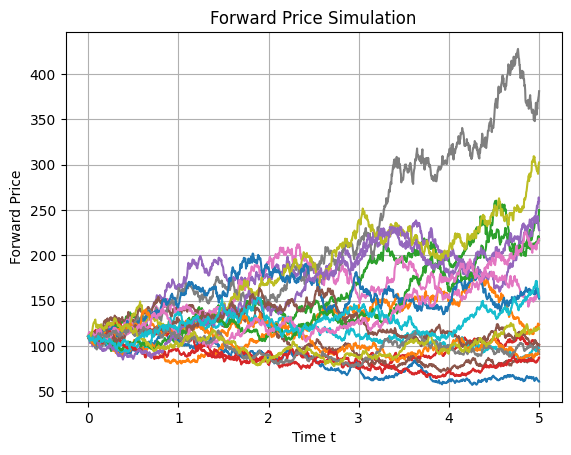

In [5]:
# Compute the corresponding forward price
ert = np.exp([r*(T-i*dt) for i in range(252*T+1)])
arr_F = arr_S * ert

print(f'The first few simulation results:\n\n {arr_F[:5]}\n\n')


# Plot some simulation results
t = np.linspace(0, T, 252*T+1)
for F in arr_F[:20]:
    plt.plot(t, F)
plt.xlabel('Time t')
plt.ylabel('Forward Price')
plt.title('Forward Price Simulation')
plt.grid(True)
plt.show()

In [6]:
# Compute dollarized Sharpe ratio
SR_F = ( arr_F[:,-1] - arr_F[:,0] ).mean() / ( arr_F[:,-1] - arr_F[:,0] ).std()
print(f'The dollarized Sharpe ratio is: {SR_F}')

The dollarized Sharpe ratio is: 0.46955256849615995


## Futures contract
Assume futures price obeys the same spot-forward relationship, i.e.

$ F_t = S_te^{r(T-t)} $

We then move on to calculating SR, assuming once again that the financing cost aligns with the interest rate. As mentioned earlier, initial margin is irrelevant here. Let's consider daily-settled full variation margin. It is important to observe that the previous day's profit and loss has a greater influence due to the time value, which distinguishes futures contracts from forward contracts. Essentially, owning the underlying stock and borrowing (or lending) money secured by the stock on a daily basis is equivalent to engaging in a futures contract.

In [7]:
arr_pnl = np.diff( arr_F, prepend = S0*np.exp(r*T) )
arr_pnl_forward_value = arr_pnl * ert

In [8]:
# Compute dollarized Sharpe ratio
SR_Fu = ( arr_pnl_forward_value.sum(axis=1) ).mean() / ( arr_pnl_forward_value.sum(axis=1) ).std()
print(f'The dollarized Sharpe ratio is: {SR_Fu}')

The dollarized Sharpe ratio is: 0.47116906654184565
